In [1]:
import requests
import bs4
import pandas as pd
import re
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt



In [2]:
url = "https://www.checkraka.com/car/?quicksearch_order=ASC&page=1"
url

'https://www.checkraka.com/car/?quicksearch_order=ASC&page=1'

In [3]:
data_list = []

#การเข้าถึงลิ้งค์ของทุกเวปไซต์
page = 1
while page < 87:
    url = 'https://www.checkraka.com/car/?quicksearch_order=ASC&page=' + str(page)
    print(url)
    page += 1
    
    #ดึงข้อมูลของ 1 หน้าเวป
    data = requests.get(url)
    
    #แปลงเป็น BeautifulSoup
    soup = bs4.BeautifulSoup(data.text)
    
    #รายละเอียดข้อมูล 1 รายการ
    all_unit_tag = 'div'
    all_unit_attribute = 'class'
    all_unit_value = 'card'
    
    #รายละเอียดข้อมูลชื่อสินค้าในรายการนั้นๆ
    title_tag = 'a'

    #รายละเอียดข้อมูลราคาในสินค้ารายการนั้นๆ
    price_tag = 'label'
    price_attribute = 'class'
    price_value = 'price'
    
    
    #ดึงทุกรายการ
    all_unit_element = soup.find_all(all_unit_tag,{all_unit_attribute:all_unit_value})
    
    
    #ดึงข้อมูลทีละรายการบันทึกลง List
    for unit in all_unit_element:
        data_dict = dict()
        data_dict['title'] = unit.find(title_tag).text
        data_dict['price'] = unit.find(price_tag).text
        data_list.append(data_dict)
    
    #แจ้งเบื้องต้นว่าทำงานถึงหน้าไหน
    print('Completed page no. ...', page-1)

https://www.checkraka.com/car/?quicksearch_order=ASC&page=1
Completed page no. ... 1
https://www.checkraka.com/car/?quicksearch_order=ASC&page=2
Completed page no. ... 2
https://www.checkraka.com/car/?quicksearch_order=ASC&page=3
Completed page no. ... 3
https://www.checkraka.com/car/?quicksearch_order=ASC&page=4
Completed page no. ... 4
https://www.checkraka.com/car/?quicksearch_order=ASC&page=5
Completed page no. ... 5
https://www.checkraka.com/car/?quicksearch_order=ASC&page=6
Completed page no. ... 6
https://www.checkraka.com/car/?quicksearch_order=ASC&page=7
Completed page no. ... 7
https://www.checkraka.com/car/?quicksearch_order=ASC&page=8
Completed page no. ... 8
https://www.checkraka.com/car/?quicksearch_order=ASC&page=9
Completed page no. ... 9
https://www.checkraka.com/car/?quicksearch_order=ASC&page=10
Completed page no. ... 10
https://www.checkraka.com/car/?quicksearch_order=ASC&page=11
Completed page no. ... 11
https://www.checkraka.com/car/?quicksearch_order=ASC&page=12


In [4]:
df = pd.DataFrame(data_list)
df

,title,price
0,มาสด้า Mazda-BT-50 Double Cab 4X4 3.0 SP 6AT-ป...,"1,272,000 บาท"
1,เมอร์เซเดส-เบนซ์ Mercedes-benz E-Class E 350 e...,"4,080,000 บาท"
2,เปอโยต์ Peugeot 408 GT ปี 2024,"1,799,000 บาท"
3,เมอร์เซเดส-เบนซ์ Mercedes-benz E-Class E 220 d...,"3,930,000 บาท"
4,เปอโยต์ Peugeot 408 Allure Plus ปี 2024,"1,599,000 บาท"
...,...,...
1021,เฟียต Fiat 500 Lounge Premium ปี 2010,"1,850,000 บาท"
1022,เฟียต Fiat 500 Limited by Diesel ปี 2010,"1,980,000 บาท"
1023,เฟียต Fiat-500C Standard-ปี 2010,"2,190,000 บาท"
1024,โปรตอน Proton Saga Base Line MT ปี 2010,"399,000 บาท"


In [5]:
df.info()
df.shape

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1026 entries, 0 to 1025
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   title   1026 non-null   object
 1   price   1026 non-null   object
dtypes: object(2)
memory usage: 16.2+ KB


(1026, 2)

In [6]:
df['title'].head(10)

0    มาสด้า Mazda-BT-50 Double Cab 4X4 3.0 SP 6AT-ป...
1    เมอร์เซเดส-เบนซ์ Mercedes-benz E-Class E 350 e...
2                       เปอโยต์ Peugeot 408 GT ปี 2024
3    เมอร์เซเดส-เบนซ์ Mercedes-benz E-Class E 220 d...
4              เปอโยต์ Peugeot 408 Allure Plus ปี 2024
5                   เปอโยต์ Peugeot 408 Allure ปี 2024
6     แอสตัน มาร์ติน Aston Martin-DB12 Volante-ปี 2024
7                    ฮอนด้า Honda City Turbo S ปี 2024
8            บีวายดี BYD Sealion6 DM-i Premium ปี 2024
9           จี๊ป Jeep-Wrangler Rubicon 4 doors-ปี 2024
Name: title, dtype: object

In [7]:
def year_d(text):
    match = re.search(r'ปี (\d{4})', text)
    return match.group(1) if match else None

df['Year'] = df['title'].apply(year_d)
df

,title,price,Year
0,มาสด้า Mazda-BT-50 Double Cab 4X4 3.0 SP 6AT-ป...,"1,272,000 บาท",2024
1,เมอร์เซเดส-เบนซ์ Mercedes-benz E-Class E 350 e...,"4,080,000 บาท",2024
2,เปอโยต์ Peugeot 408 GT ปี 2024,"1,799,000 บาท",2024
3,เมอร์เซเดส-เบนซ์ Mercedes-benz E-Class E 220 d...,"3,930,000 บาท",2024
4,เปอโยต์ Peugeot 408 Allure Plus ปี 2024,"1,599,000 บาท",2024
...,...,...,...
1021,เฟียต Fiat 500 Lounge Premium ปี 2010,"1,850,000 บาท",2010
1022,เฟียต Fiat 500 Limited by Diesel ปี 2010,"1,980,000 บาท",2010
1023,เฟียต Fiat-500C Standard-ปี 2010,"2,190,000 บาท",2010
1024,โปรตอน Proton Saga Base Line MT ปี 2010,"399,000 บาท",2010


In [8]:
df['Year'] = pd.to_numeric(df['Year'])

In [9]:
df['price_baht'] = df['price'].str.extract('(.+) บาท')
df['price_baht'] = pd.to_numeric(df['price_baht'].str.replace(",",""))
df.head(10)

,title,price,Year,price_baht
0,มาสด้า Mazda-BT-50 Double Cab 4X4 3.0 SP 6AT-ป...,"1,272,000 บาท",2024,1272000.0
1,เมอร์เซเดส-เบนซ์ Mercedes-benz E-Class E 350 e...,"4,080,000 บาท",2024,4080000.0
2,เปอโยต์ Peugeot 408 GT ปี 2024,"1,799,000 บาท",2024,1799000.0
3,เมอร์เซเดส-เบนซ์ Mercedes-benz E-Class E 220 d...,"3,930,000 บาท",2024,3930000.0
4,เปอโยต์ Peugeot 408 Allure Plus ปี 2024,"1,599,000 บาท",2024,1599000.0
5,เปอโยต์ Peugeot 408 Allure ปี 2024,"1,499,000 บาท",2024,1499000.0
6,แอสตัน มาร์ติน Aston Martin-DB12 Volante-ปี 2024,"24,900,000 บาท",2024,24900000.0
7,ฮอนด้า Honda City Turbo S ปี 2024,"599,000 บาท",2024,599000.0
8,บีวายดี BYD Sealion6 DM-i Premium ปี 2024,"1,039,000 บาท",2024,1039000.0
9,จี๊ป Jeep-Wrangler Rubicon 4 doors-ปี 2024,"5,490,000 บาท",2024,5490000.0


In [10]:
def thai_words(text):
    match = re.search(r'([\u0E00-\u0E7F]+)', text)
    return match.group(1) if match else None

# ใช้ apply เพื่อนำฟังก์ชันไปใช้กับแต่ละแถว
df['thai_words'] = df['title'].apply(thai_words)
df

,title,price,Year,price_baht,thai_words
0,มาสด้า Mazda-BT-50 Double Cab 4X4 3.0 SP 6AT-ป...,"1,272,000 บาท",2024,1272000.0,มาสด้า
1,เมอร์เซเดส-เบนซ์ Mercedes-benz E-Class E 350 e...,"4,080,000 บาท",2024,4080000.0,เมอร์เซเดส
2,เปอโยต์ Peugeot 408 GT ปี 2024,"1,799,000 บาท",2024,1799000.0,เปอโยต์
3,เมอร์เซเดส-เบนซ์ Mercedes-benz E-Class E 220 d...,"3,930,000 บาท",2024,3930000.0,เมอร์เซเดส
4,เปอโยต์ Peugeot 408 Allure Plus ปี 2024,"1,599,000 บาท",2024,1599000.0,เปอโยต์
...,...,...,...,...,...
1021,เฟียต Fiat 500 Lounge Premium ปี 2010,"1,850,000 บาท",2010,1850000.0,เฟียต
1022,เฟียต Fiat 500 Limited by Diesel ปี 2010,"1,980,000 บาท",2010,1980000.0,เฟียต
1023,เฟียต Fiat-500C Standard-ปี 2010,"2,190,000 บาท",2010,2190000.0,เฟียต
1024,โปรตอน Proton Saga Base Line MT ปี 2010,"399,000 บาท",2010,399000.0,โปรตอน


In [11]:
dfnew = df
dfnew.drop(['title','price'], axis=1, inplace=True)


In [12]:
dfnew_missing = dfnew[dfnew.isna().any(axis=1)]
dfnew_missing

,Year,price_baht,thai_words
45,2024,NaN,เอชเคแอล
78,2024,NaN,เอชเคแอล
91,2024,NaN,เกีย
101,2024,NaN,ฮอนด้า
169,2024,NaN,มินิ
184,2024,NaN,เอ็มจี
188,2024,NaN,ฮอนด้า
190,2024,NaN,ฮอนด้า
192,2024,NaN,ฮอนด้า
321,2023,NaN,ปอร์เช่


In [13]:
dfnew = dfnew.dropna()
dfnew.shape

(1013, 3)

In [14]:
dfnew.groupby('Year')[['price_baht']].mean()

,price_baht
Year,
2010,1.511625e+06
2011,3.850000e+07
2012,6.067733e+06
2013,1.252895e+07
2014,1.477222e+07
2015,1.552320e+07
2016,5.996648e+06
2017,1.051523e+07
2018,7.820364e+06


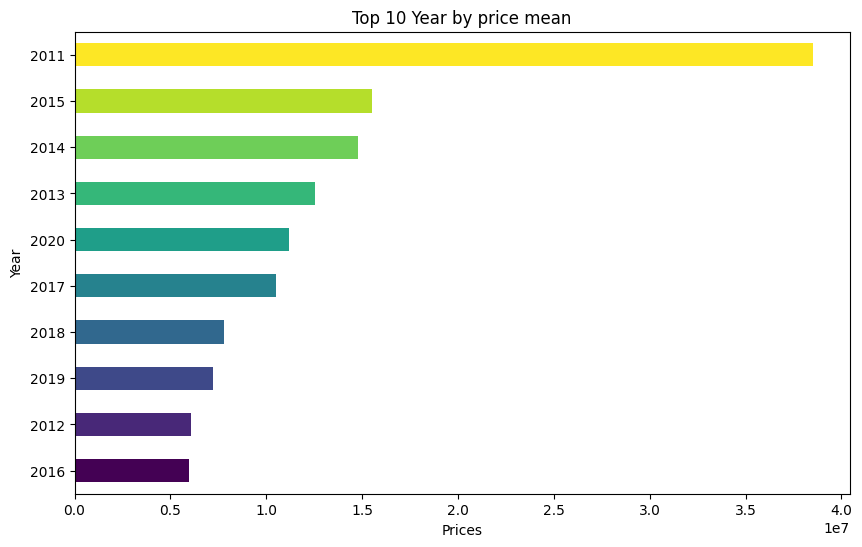

In [15]:
year_mprice = dfnew.groupby('Year')['price_baht'].mean().sort_values(ascending=False).head(10)
cmap = plt.cm.viridis
colors = cmap(np.linspace(0, 1, len(year_mprice)))
year_mprice.sort_values().plot(kind='barh', figsize=(10, 6),color=colors)
plt.title('Top 10 Year by price mean')
plt.xlabel('Prices')
plt.ylabel('Year')
plt.show()